<a href="https://colab.research.google.com/github/AzIz000/machine-learning/blob/master/VIZ_5_2_Seaborn_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INTRO TO SEABORN**

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt;

## **Built-in Datasets**

*   Quick access to a small number of example datasets that are useful for documenting seaborn or generating reproducible examples for bug reports.
*   Loads an example dataset from the online repository (requires internet).



In [ ]:
tips_data = sns.load_dataset('tips')
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
flights_data = sns.load_dataset('flights')
flights_data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


##**A Simple Example** 

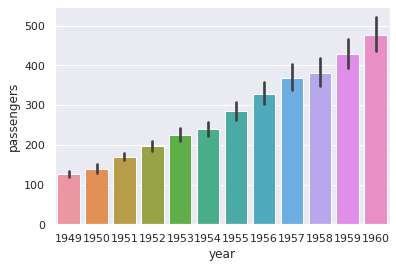

In [ ]:
sns.set(style='darkgrid') 
sns.barplot(x='year', y='passengers', data=flights_data);

## **Distribution Plots**

### **Distplot**

Represents the distribution of a univariate set of observations. Three main elements:


*   **Histogram:**  Represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.


*   **Kernel Density Estimation (KDE):** encode the density of observations on one axis with height along the other axis. More info [here](http://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation).


*   **Rugplot:** Plot datapoints in an array as sticks on an axis.



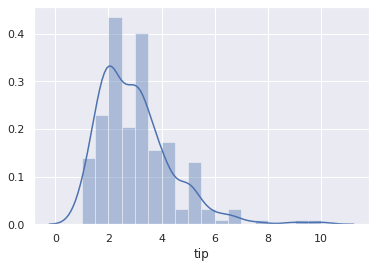

In [ ]:
#Default histogram + KDE
sns.distplot(tips_data['tip']); # See Matplotlib output Axes

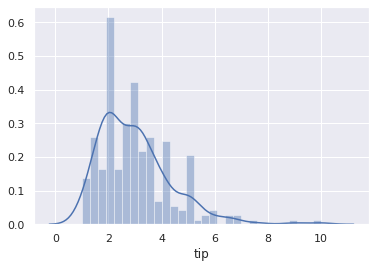

In [ ]:
# Adapt bins
sns.distplot(tips_data['tip'],bins=30);

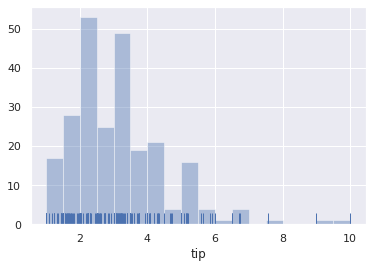

In [ ]:
#Without KDE
sns.distplot(tips_data['tip'],kde=False,rug=True);

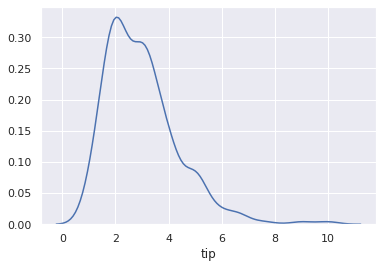

In [ ]:
# Just KDE
sns.distplot(tips_data['tip'],kde=True,rug=False,hist=False);

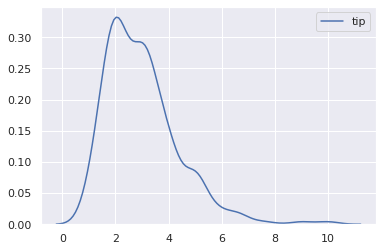

In [ ]:
# KDE Plot
sns.kdeplot(tips_data['tip']);

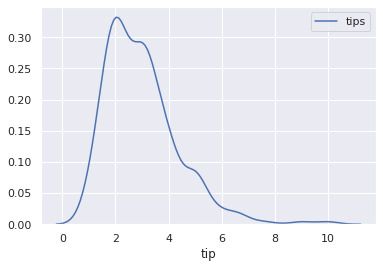

In [ ]:
# Just KDE with label
sns.distplot(tips_data['tip'],kde=True,rug=False,hist=False, label='tips');

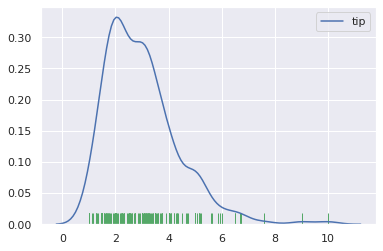

In [ ]:
# KDE + Rug Plot
sns.kdeplot(tips_data['tip'])
sns.rugplot(tips_data['tip'],c='g');

### **Jointplot**

Match up two distplots for bivariate data.

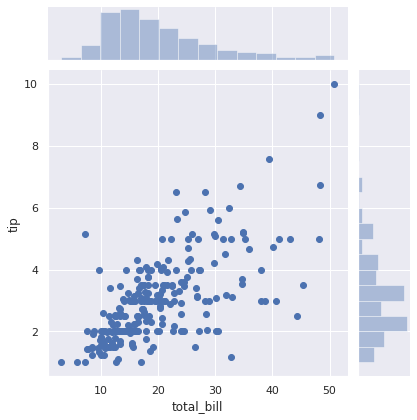

In [ ]:
# Compare total bill and tip scatter: each observation is shown with point at the x and y values, analogous to a rug plot on two dimensions.
sns.jointplot(x='total_bill', y='tip', data=tips_data); # kind='scatter'

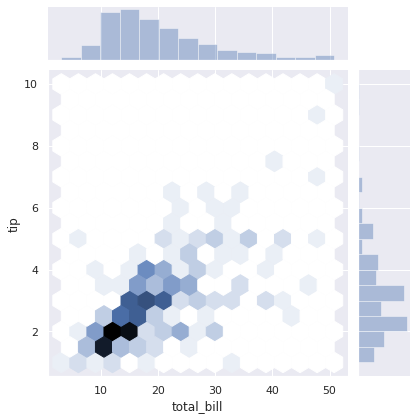

In [ ]:
# Compare total bill and tip hex: it shows the counts of observations that fall within hexagonal bins
sns.jointplot(x='total_bill', y='tip', data=tips_data, kind='hex');

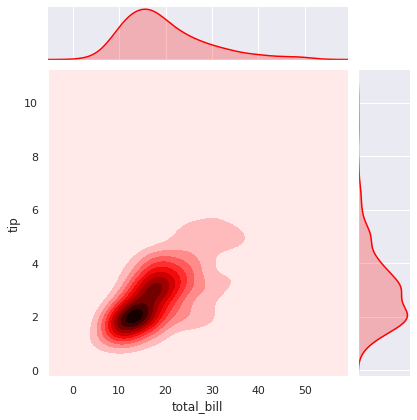

In [ ]:
# Compare total bill and tip KDE
sns.jointplot(x='total_bill', y='tip', data=tips_data, kind='kde',color='red');

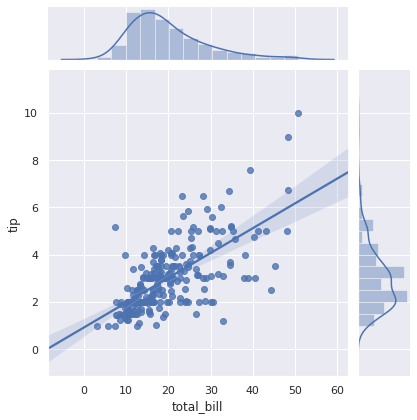

In [ ]:
# Compare total bill and tip reg
sns.jointplot(x='total_bill', y='tip', data=tips_data, kind='reg', truncate=False);

### **Pairplot**

Pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

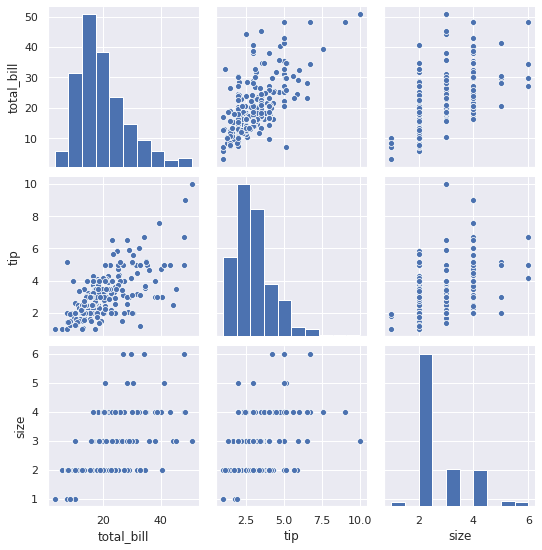

In [ ]:
sns.pairplot(tips_data);

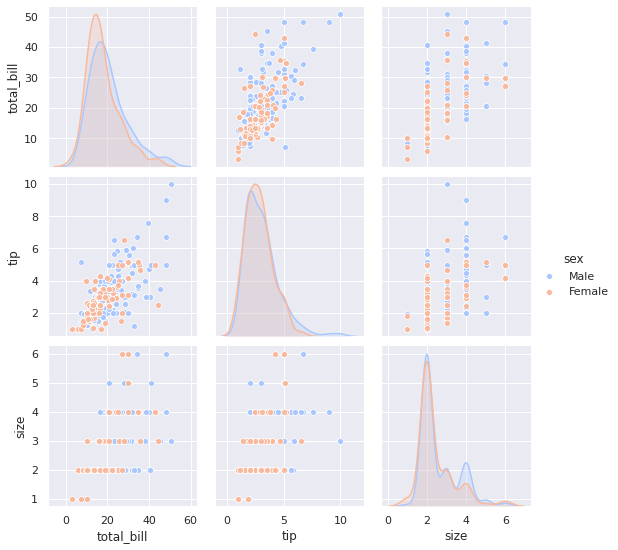

In [ ]:
#Add color palete based on categorical column
sns.pairplot(tips_data,hue='sex',palette='coolwarm');

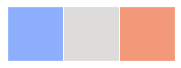

In [ ]:
#Check palette colors
sns.palplot(sns.color_palette("coolwarm", 3))

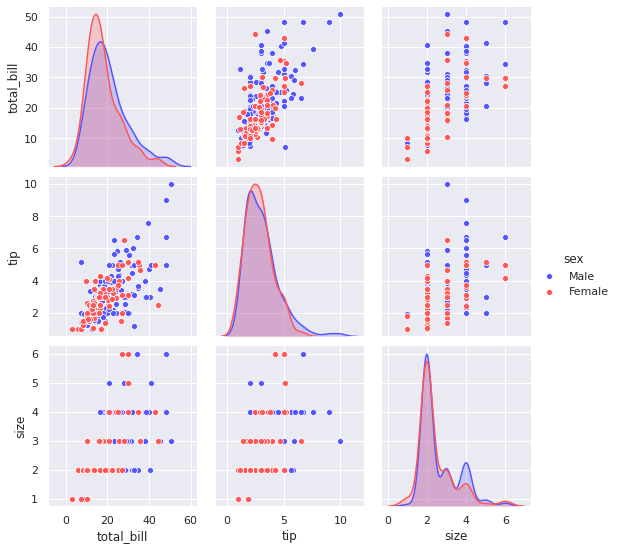

In [ ]:
#Custom colors for better visualization
sns.pairplot(tips_data,hue='sex',palette='seismic');

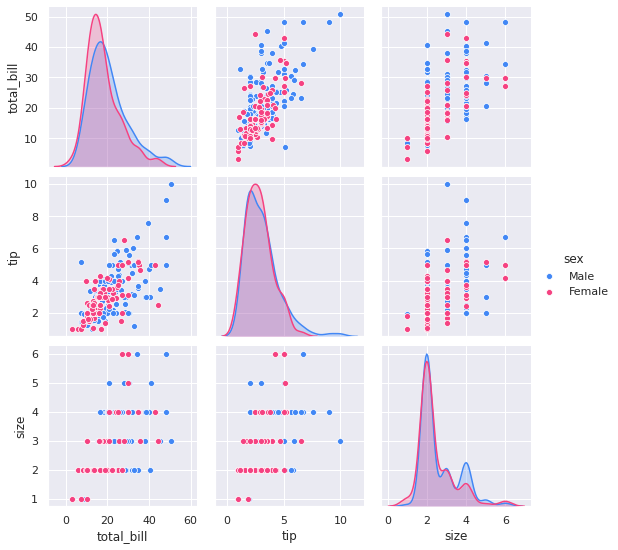

In [ ]:
#Custom colors for better visualization
sns.pairplot(tips_data,hue='sex',palette={'Male':'#4287f5', 'Female':'#f54281'});

## **Categorical Plots**

### **Barplot**

Barplot gets aggregate data off a categorical feature in your data.


It operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also computes a confidence interval around the estimate, which is plotted using error bars.


Useful when you want to show an estimate of the central tendency of the values.

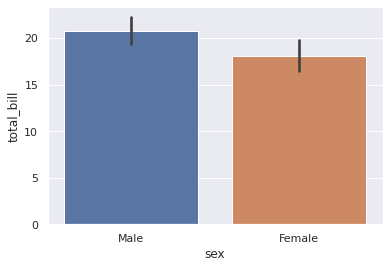

In [ ]:
#Mean barplot
sns.barplot(x='sex',y='total_bill',data=tips_data);

You can change the estimator object to your own function, that converts a vector to a scalar:

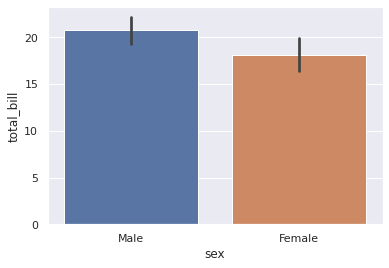

In [ ]:
#Median barplot
sns.barplot(x='sex',y='total_bill',data=tips_data,estimator=np.mean);

### **Countplot**

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

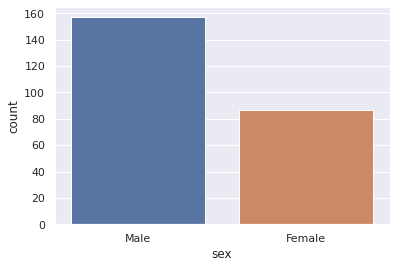

In [ ]:
sns.countplot(x='sex',data=tips_data);

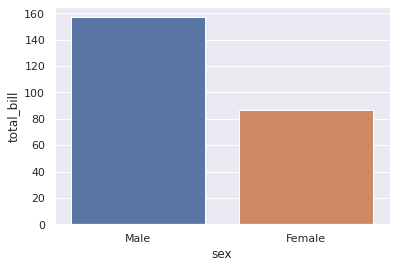

In [ ]:
sns.barplot(x='sex',y='total_bill',data=tips_data,estimator=np.count_nonzero); #idem with barplot

### **Boxplot**

A **barplot shows only the mean (or other estimator) value**, but in many cases it may be more informative to show the distribution of values at each level of the categorical variables. In that case, other approaches such as a box or violin plot may be more appropriate.


A box plot (or box-and-whisker plot) **shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels** of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

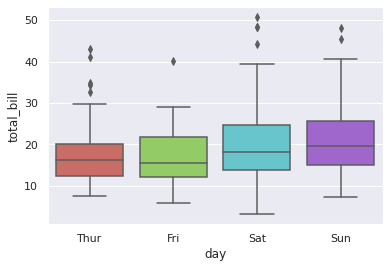

In [ ]:
sns.boxplot(x="day", y="total_bill", data=tips_data,palette='hls');

In [ ]:
#Calculate quartiles
tips_data_thur = tips_data[tips_data['day']=='Thur']
tips_data_thur.describe()

,total_bill,tip,size
count,62.000000,62.000000,62.000000
mean,17.682742,2.771452,2.451613
std,7.886170,1.240223,1.066285
min,7.510000,1.250000,1.000000
25%,12.442500,2.000000,2.000000
50%,16.200000,2.305000,2.000000
75%,20.155000,3.362500,2.000000
max,43.110000,6.700000,6.000000


In [ ]:
#Calculate IQR and top outliers
x = tips_data_thur['total_bill'].values
q75, q25 = np.percentile(x, [75 ,25])
iqr = q75-q25
whisker_top = q75 + 1.5*iqr
print("Whysker top: ", whisker_top)
print("Top outliers: ",x[x>whisker_top])

Whysker top:  31.723750000000003
Top outliers:  [32.68 34.83 34.3  41.19 43.11]


More information can be found [here](https://www.purplemath.com/modules/boxwhisk3.htm).

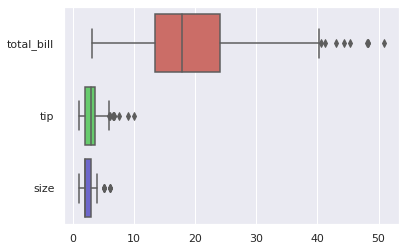

In [ ]:
sns.boxplot(data=tips_data,palette='hls',orient='h');

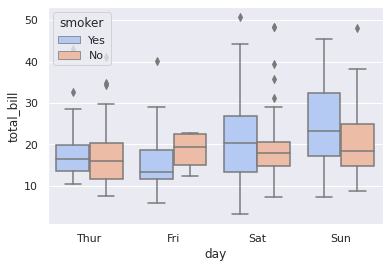

In [ ]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips_data, palette="coolwarm");

### **Violinplot**

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

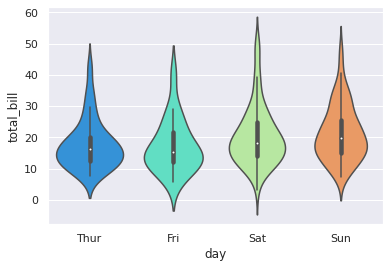

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips_data,palette='rainbow');

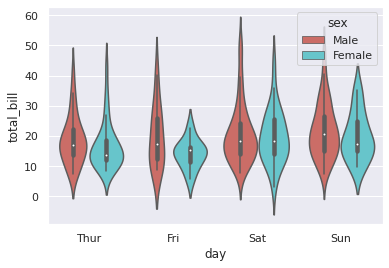

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips_data,hue='sex',palette='hls');

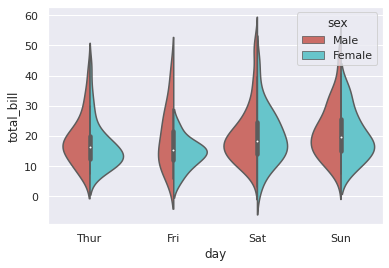

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips_data,hue='sex',split=True,palette='hls');

### **Stripplot**

The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

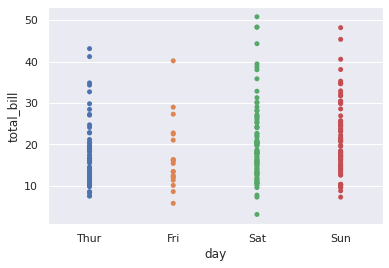

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips_data, jitter=False);

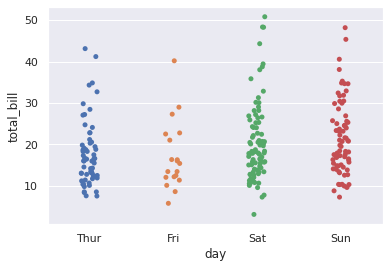

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips_data);

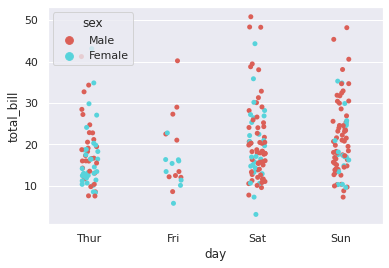

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips_data,hue='sex',palette='hls');

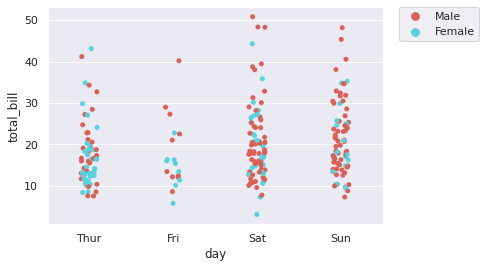

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips_data,hue='sex',palette='hls')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

### **Swarmplot**

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

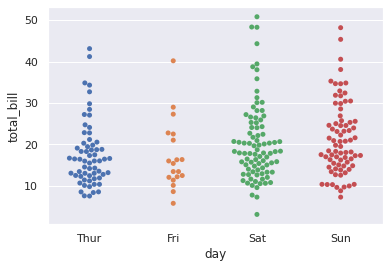

In [ ]:
sns.swarmplot(x="day", y="total_bill", data=tips_data);

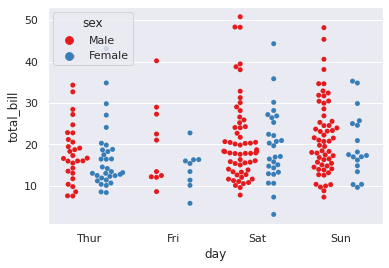

In [ ]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips_data, palette="Set1", dodge=True);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2971: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


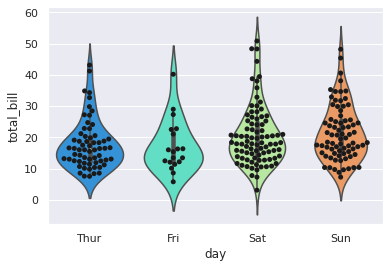

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips_data,palette='rainbow')
sns.swarmplot(x="day", y="total_bill",data=tips_data, color="k", split=True);

### **Factorplot**

factorplot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type:

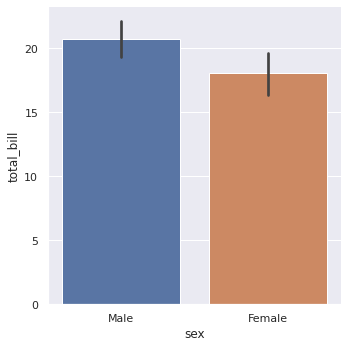

In [ ]:
sns.catplot(x='sex',y='total_bill',data=tips_data,kind='bar');

## **Grid Plots**

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

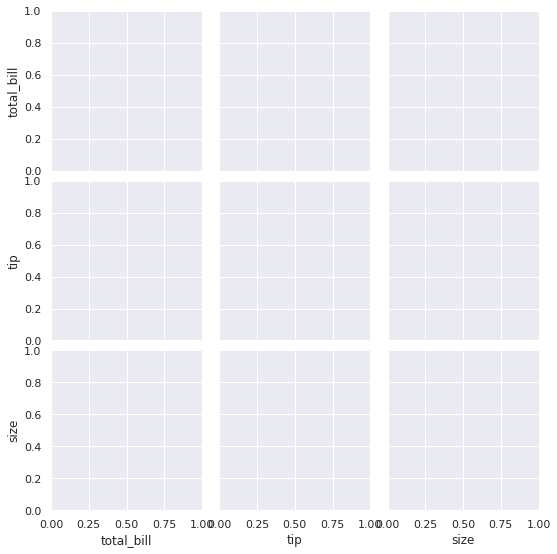

In [ ]:
# Just the Grid
sns.PairGrid(tips_data);

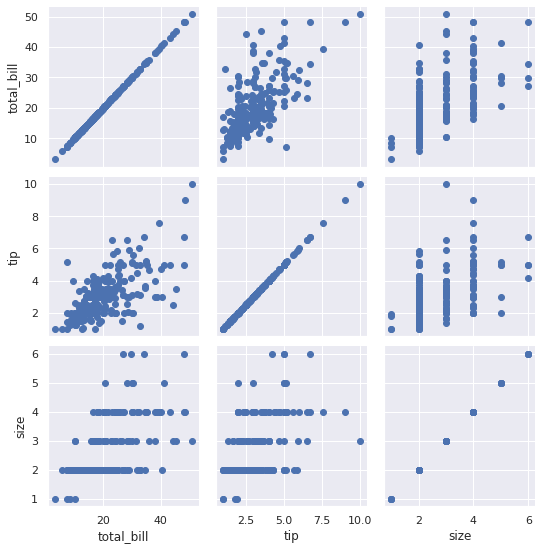

In [ ]:
# Then you map to the grid
g = sns.PairGrid(tips_data)
g.map(plt.scatter);

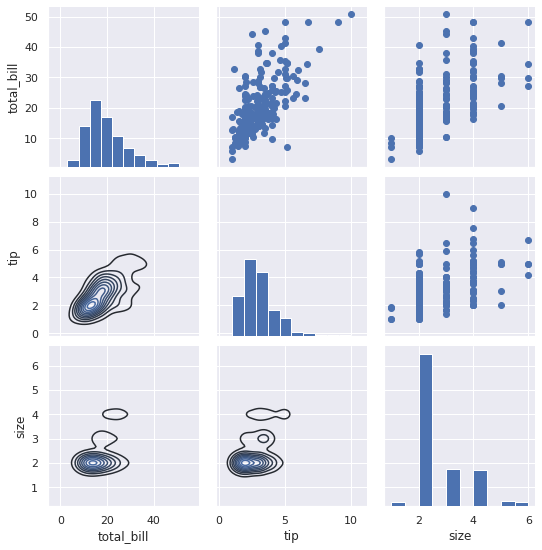

In [ ]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(tips_data)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot);

## **Matrix Plots**

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

### **Heatmap**

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [ ]:
# Matrix form for correlation data
tips_data.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


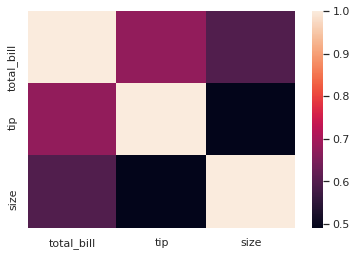

In [ ]:
sns.heatmap(tips_data.corr());

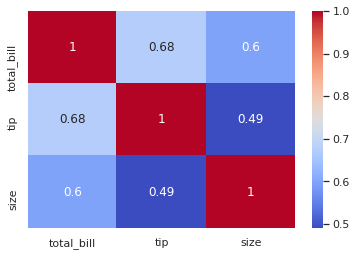

In [ ]:
sns.heatmap(tips_data.corr(),cmap='coolwarm',annot=True);

With flights data:

In [ ]:
flights_pv = flights_data.pivot_table(values='passengers',index='month',columns='year')
flights_pv

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


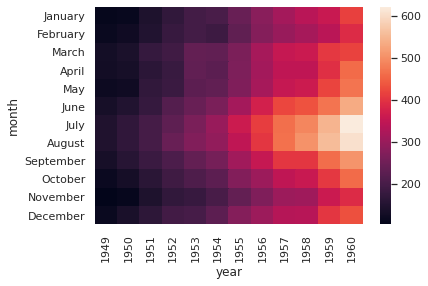

In [ ]:
sns.heatmap(flights_pv);

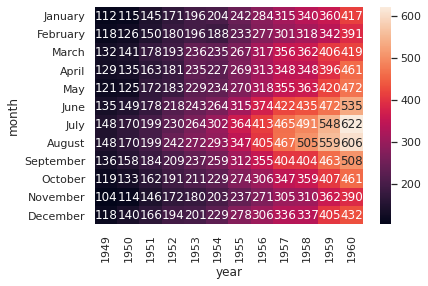

In [ ]:
sns.heatmap(flights_pv,annot=True,fmt='d');

Check formatting options [here](https://mkaz.blog/code/python-string-format-cookbook/)

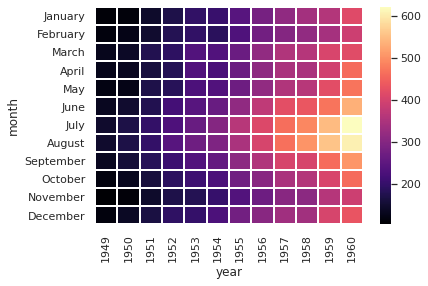

In [ ]:
sns.heatmap(flights_pv,cmap='magma',linecolor='white',linewidths=1);

### **Clustermap**

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

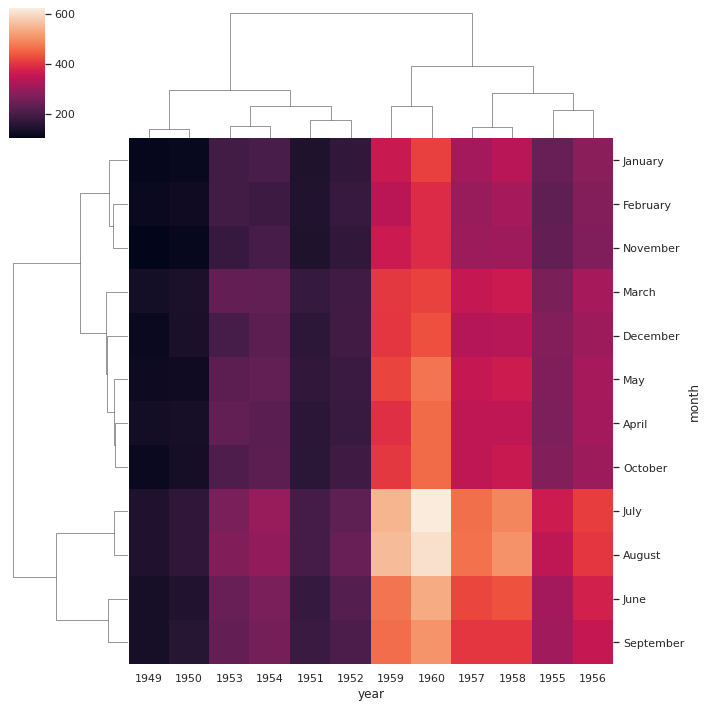

In [ ]:
sns.clustermap(flights_pv);

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months).

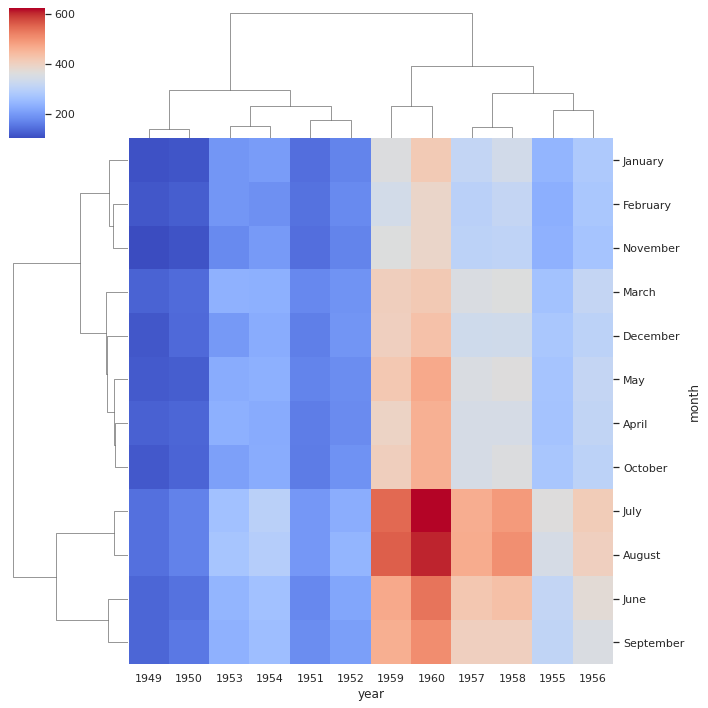

In [ ]:
# More options to get the information a little clearer
sns.clustermap(flights_pv,cmap='coolwarm');

More info regarding hierarchical clustering [here](https://blog.tdwi.eu/hierarchical-clustering-in-python/) and [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).

## **Look & Feel**

### **Styles**

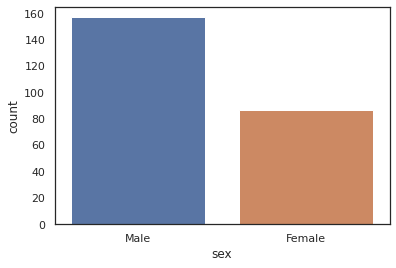

In [ ]:
sns.set_style('white')
sns.countplot(x='sex',data=tips_data);

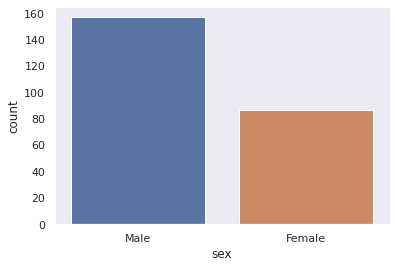

In [ ]:
sns.set_style('dark')
sns.countplot(x='sex',data=tips_data);

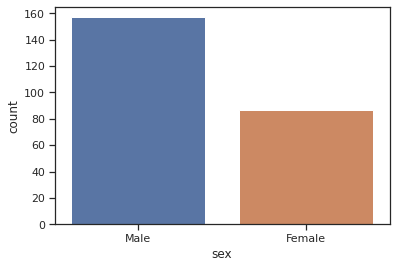

In [ ]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips_data);

### **Spines**

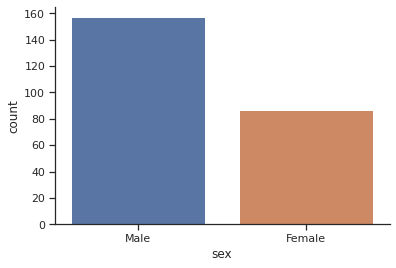

In [ ]:
sns.countplot(x='sex',data=tips_data)
sns.despine();

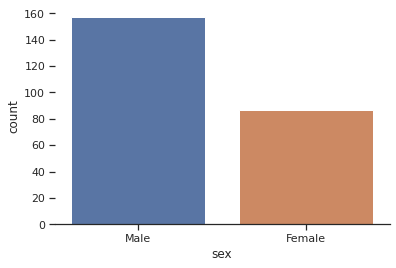

In [ ]:
sns.countplot(x='sex',data=tips_data)
sns.despine(left=True);

### **Size**

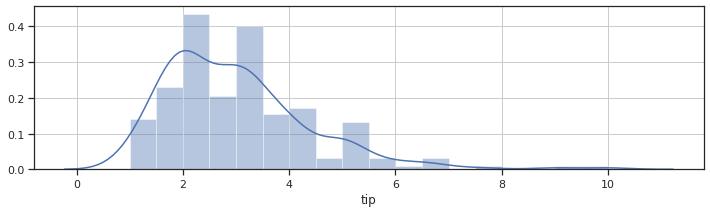

In [ ]:
plt.figure(figsize=(12,3))
plt.grid()
sns.distplot(tips_data['tip']);

### **Colors**

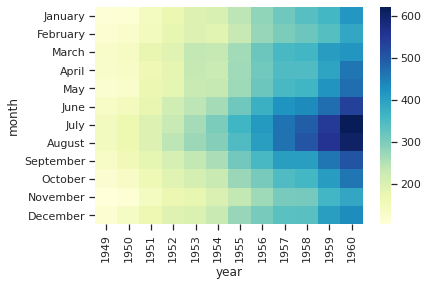

In [ ]:
sns.heatmap(flights_pv, cmap="YlGnBu");

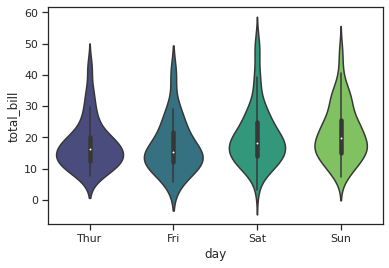

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips_data,palette='viridis');